<a href="https://colab.research.google.com/github/segnig/Intelligent-Complaint-Analysis-for-Financial-Services/blob/task-1/notebooks/01_eda_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
FILE_PATH = "/content/drive/MyDrive/Data Science/Week-6/complaints.csv"

import pandas as pd
df = pd.read_csv(FILE_PATH)
df.head()

/tmp/ipython-input-1-2131898952.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILE_PATH)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [ ]:
import re

def clean_col(col):
    # Lowercase the column name
    col = col.lower()

    # Replace spaces with underscores
    col = col.replace(" ", "_")

    # Remove special characters (keep only alphanumeric and underscore)
    col = re.sub(r'[^a-z0-9_]', '', col)

    return col

column_names = [clean_col(col) for col in df.columns]
df.columns = column_names

df.head()


,date_received,product,subproduct,issue,subissue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


## Basic EDA

In [ ]:
from IPython.display import display, Markdown

print("Missing Values:")
display(df.isna().sum()/ len(df) * 100)

Missing Values:


,0
date_received,0.000000
product,0.000000
subproduct,2.448491
issue,0.000062
subissue,8.736105
consumer_complaint_narrative,68.982113
company_public_response,49.638999
company,0.000000
state,0.567296
zip_code,0.314554


In [ ]:
# View sample rows
df[['product', 'consumer_complaint_narrative']].sample(12)

,product,consumer_complaint_narrative
4610699,"Credit reporting, credit repair services, or o...",NaN
7609439,Bank account or service,I was signed up for PayPal Credit without know...
8309947,"Credit reporting, credit repair services, or o...",NaN
7636407,Mortgage,NaN
5468404,Student loan,"In XXXX, I co-signed for a student loan for my..."
8420905,Credit reporting or other personal consumer re...,NaN
1583441,Credit reporting or other personal consumer re...,NaN
2292563,Credit reporting or other personal consumer re...,NaN
6242996,Checking or savings account,I have filed several disputes which should hav...
143910,Credit reporting or other personal consumer re...,NaN


## 3: Distribution of Complaints by Product

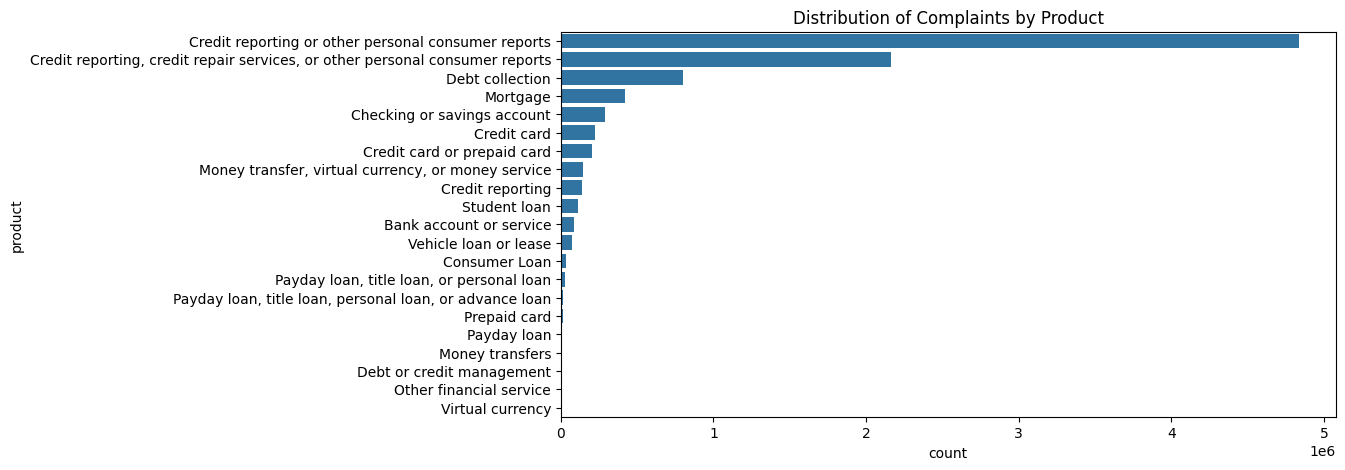

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, y='product', order=df['product'].value_counts().index)
plt.title("Distribution of Complaints by Product")
plt.show()

In [ ]:
df['product'].value_counts()

,count
product,
Credit reporting or other personal consumer reports,4834855
"Credit reporting, credit repair services, or other personal consumer reports",2163857
Debt collection,799197
Mortgage,422254
Checking or savings account,291178
Credit card,226686
Credit card or prepaid card,206369
"Money transfer, virtual currency, or money service",145066
Credit reporting,140429


In [ ]:
# count of unique values each
# Report: column names and number of unique values
report = pd.DataFrame({
    'column_name': df.columns,
    'unique_values': [df[col].nunique() for col in df.columns]
})

# Display the report
report


,column_name,unique_values
0,date_received,4952
1,product,21
2,subproduct,86
3,issue,178
4,subissue,272
5,consumer_complaint_narrative,2108758
6,company_public_response,11
7,company,7674
8,state,63
9,zip_code,34965


## Length of Complaint Narratives

In [ ]:
df['narrative_length'] = df['consumer_complaint_narrative'].fillna('').apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(10,4))
sns.histplot(df['narrative_length'], bins=100)
plt.title("Distribution of Narrative Lengths")
plt.xlabel("Word Count")
plt.show()

# Check extremely short/long narratives
df[df['narrative_length'] < 10].shape, df[df['narrative_length'] > 500].shape


## 📏 Narrative Length Analysis

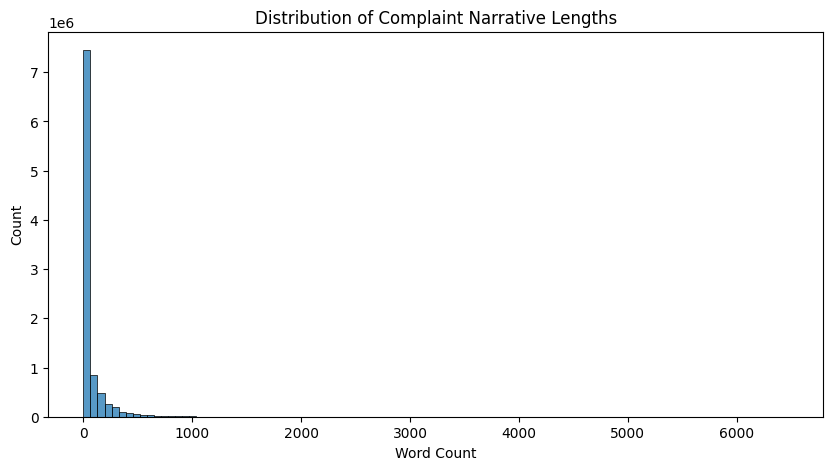

Very short (<10 words): 6650979
Very long (>500 words): 160989


In [ ]:
df['narrative_length'] = df['consumer_complaint_narrative'].fillna('').apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['narrative_length'], bins=100)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.show()

print("Very short (<10 words):", df[df['narrative_length'] < 10].shape[0])
print("Very long (>500 words):", df[df['narrative_length'] > 500].shape[0])

## 📈 Complaints With and Without Narratives

In [ ]:
with_narrative = df[df['consumer_complaint_narrative'].notna()]
without_narrative = df[df['consumer_complaint_narrative'].isna()]

print(f"With narrative: {with_narrative.shape[0]}")
print(f"Without narrative: {without_narrative.shape[0]}")

With narrative: 2980756
Without narrative: 6629041


In [ ]:
target_products = [
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later (BNPL)",
    "Savings account",
    "Money transfer, virtual currency"
]

filtered_df = df[
    (df['product'].isin(target_products)) &
    (df['consumer_complaint_narrative'].notna())
].copy()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)  # remove special characters
    text = re.sub(r"i am writing to file a complaint.*?\.", "", text)  # remove boilerplate (optional)
    text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
    return text

filtered_df["cleaned_narrative"] = filtered_df["consumer_complaint_narrative"].apply(clean_text)

print(f"Filtered dataset shape: {filtered_df.shape}")
filtered_df[['product', 'cleaned_narrative']].sample(5)


Filtered dataset shape: (80667, 20)


,product,cleaned_narrative
1680098,Credit card,i ve had a xxxx xxxx xxxx american express car...
8963005,Credit card,i am deeply concerned about the presence of th...
8446312,Credit card,on xx xx xxxx febdestiny ran a hard inquiry on...
9168697,Credit card,in xx xx 2022 citibank closed my credit card a...
9066769,Credit card,i strongly insist on the removal of this late ...


In [ ]:
filtered_df.isna().sum()

,0
date_received,0
product,0
subproduct,18837
issue,0
subissue,18897
consumer_complaint_narrative,0
company_public_response,41445
company,0
state,255
zip_code,0


## **Save Filtered Data**

In [ ]:
FILTERED_FILE_PATH = "/content/drive/MyDrive/Data Science/Week-6/filtered_complaints.csv"

filtered_df.to_csv(FILTERED_FILE_PATH, index=False)

print(f"Filtered dataset saved to {FILTERED_FILE_PATH}")

Filtered dataset saved to /content/drive/MyDrive/Data Science/Week-6/filtered_complaints.csv


## 📊 Key Findings from Exploratory Data Analysis (EDA)

The original CFPB complaint dataset contained over **9.6 million** entries across 21 product categories. However, a significant portion of these records were missing complaint narratives — a key component for semantic search and LLM-based reasoning. Specifically, **\~69%** of complaints had no narrative, rendering them unsuitable for downstream processing in a RAG pipeline. Other fields like `tags` and `consumer_disputed` also showed high proportions of missing data (over 90%), while core identifiers and response fields were mostly complete.

The dataset featured a wide variance in complaint volume per product. **Credit reporting-related products** accounted for the majority of complaints, with over 7 million combined entries, followed by debt collection and mortgages. In contrast, the five products relevant to CrediTrust — *Credit Cards, Personal Loans, BNPL, Savings Accounts, and Money Transfers* — represented a much smaller subset of the full dataset. After filtering to include only these five products and removing entries without complaint narratives, the final dataset contained **80,667** records.

Narrative analysis showed that **\~6.6 million complaints** were extremely short (fewer than 10 words), likely containing low informational value. Conversely, **\~161,000 narratives** were very long (more than 500 words), offering rich contextual data. The cleaned and filtered dataset was processed to normalize text via lowercasing and special character removal, preparing it for high-quality embeddings and semantic retrieval. This refined dataset will power the core intelligence of the CrediTrust chatbot, allowing accurate, product-specific insights.